数据可视化是讲故事的好方法，从中可以轻松地吸收信息并识别数据中的模式。我们的一位学生决定使用 Matplotlib 在 Python 中创建数据可视化，以了解 Netflix 上可用的不同类型的内容。
本文将重点介绍使用 Matplotlib 以一种有趣的方式进行数据可视化。

在 Netflix 上看完精彩的节目或电影后，您有没有想过 Netflix 为您提供了如此多的惊人内容？当然，我并不孤单，不是吗？

一个想法会导致另一个想法，在不知不觉中，您已经下定决心进行探索性数据分析，以了解更多关于最受欢迎的演员是谁以及哪个国家/地区更喜欢哪种类型的信息。

使用 Python 制作常规的条形图和饼图，虽然它们在传达结果方面做得很好，但我想为这个项目添加一些有趣的元素。

我最近了解到你可以在 Python 最流行的数据可视化库 Matplotlib 中创建类似 xkcd 的绘图，并决定我应该在这个项目中整理我所有的 Matplotlib 可视化，只是为了让事情变得更有趣。

一起来看看数据怎么说吧！

## 导入数据
7787部电影/TV节目的信息

In [1]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Netflix历年发展里程碑
描述一下 Netflix 多年来演变的时间表。

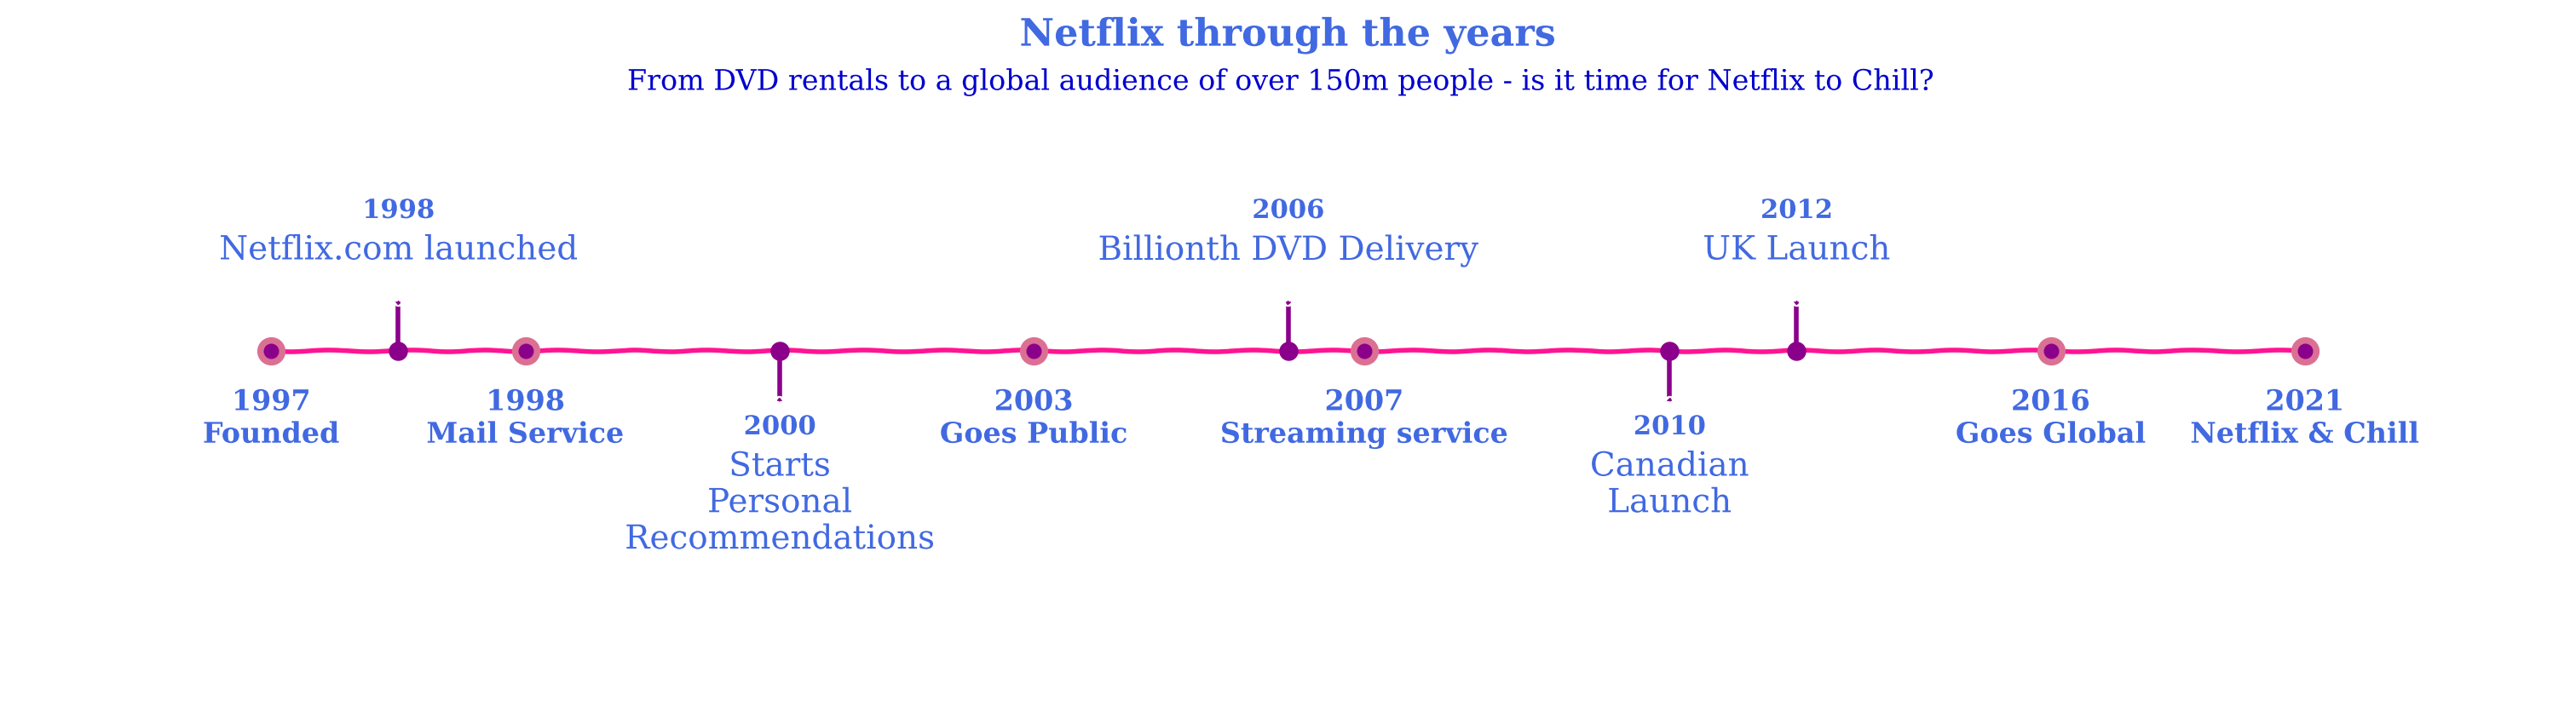

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 200


# these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]
tl_x = [1, 2, 4, 5.3, 8, 9]

# the numbers go on these
tl_sub_x = [1.5,3,5,6.5,7]

tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]

with plt.xkcd():
# Set figure & Axes
    fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
    ax.set_ylim(-2, 1.75)
    ax.set_xlim(0, 10)

    # Timeline : line
    ax.axhline(0, xmin=0.1, xmax=0.9, c='deeppink', zorder=1)

    # Timeline : Date Points
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='palevioletred', zorder=2)
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='darkmagenta', zorder=3)
    # Timeline : Time Points
    ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='darkmagenta',zorder=4)

    # Date Text
    for x, date in zip(tl_x, tl_dates):
        ax.text(x, -0.55, date, ha='center',
                fontfamily='serif', fontweight='bold',
                color='royalblue',fontsize=12)

    # Stemplot : vertical line
    levels = np.zeros(len(tl_sub_x))
    levels[::2] = 0.3
    levels[1::2] = -0.3
    markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
    plt.setp(baseline, zorder=0)
    plt.setp(markerline, marker=',', color='darkmagenta')
    plt.setp(stemline, color='darkmagenta')

    # Text
    for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
        ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
                fontfamily='serif', fontweight='bold',
                color='royalblue', fontsize=11)

        ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
            fontfamily='serif',color='royalblue')

    # Spine
    for spine in ["left", "top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Title
    ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='royalblue')
    ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='mediumblue')

    plt.show()


## 电影 vs 电视综艺

接下来，我决定看一下电影与电视节目的比例。

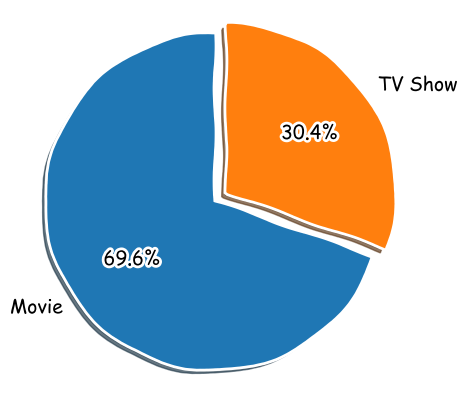

In [3]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

with plt.xkcd():
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'TV Show')
    fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=100)
    ax1.pie(grouped["count"], explode=explode, labels=grouped["type"], autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

## 内容最多的国家

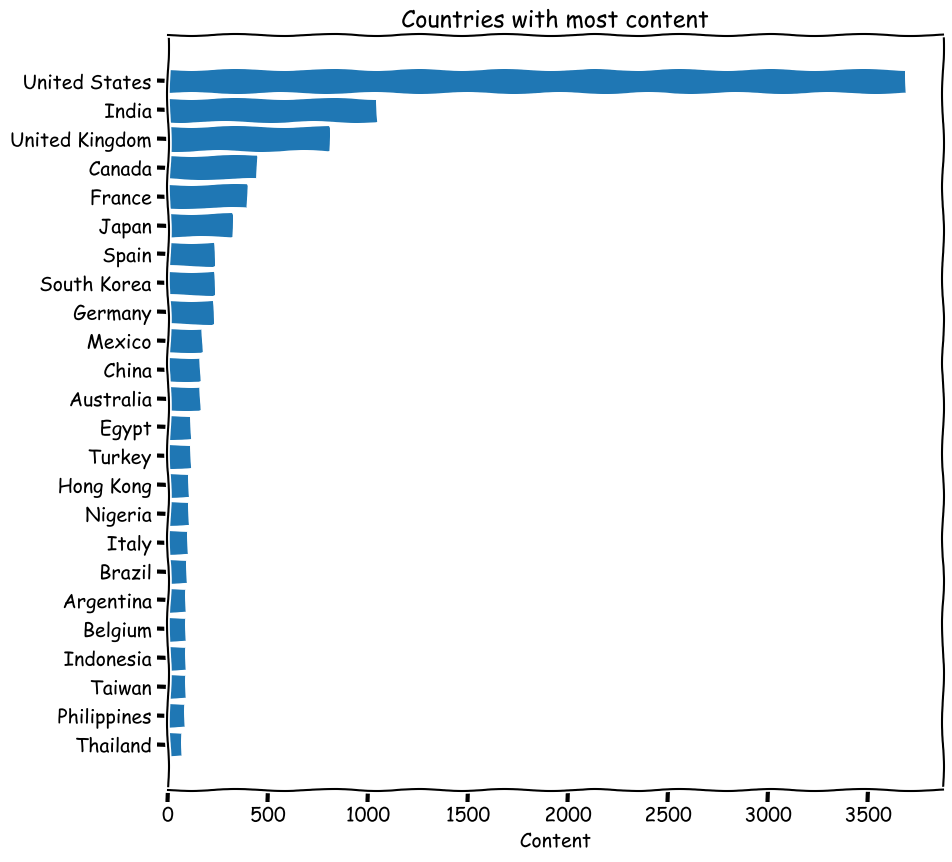

In [4]:
from collections import Counter
col = "country"

categories = ", ".join(df[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    y_pos = np.arange(len(labels))
    ax.barh(y_pos, values, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Content')
    ax.set_title('Countries with most content')

    plt.show()

## 最流行的导演

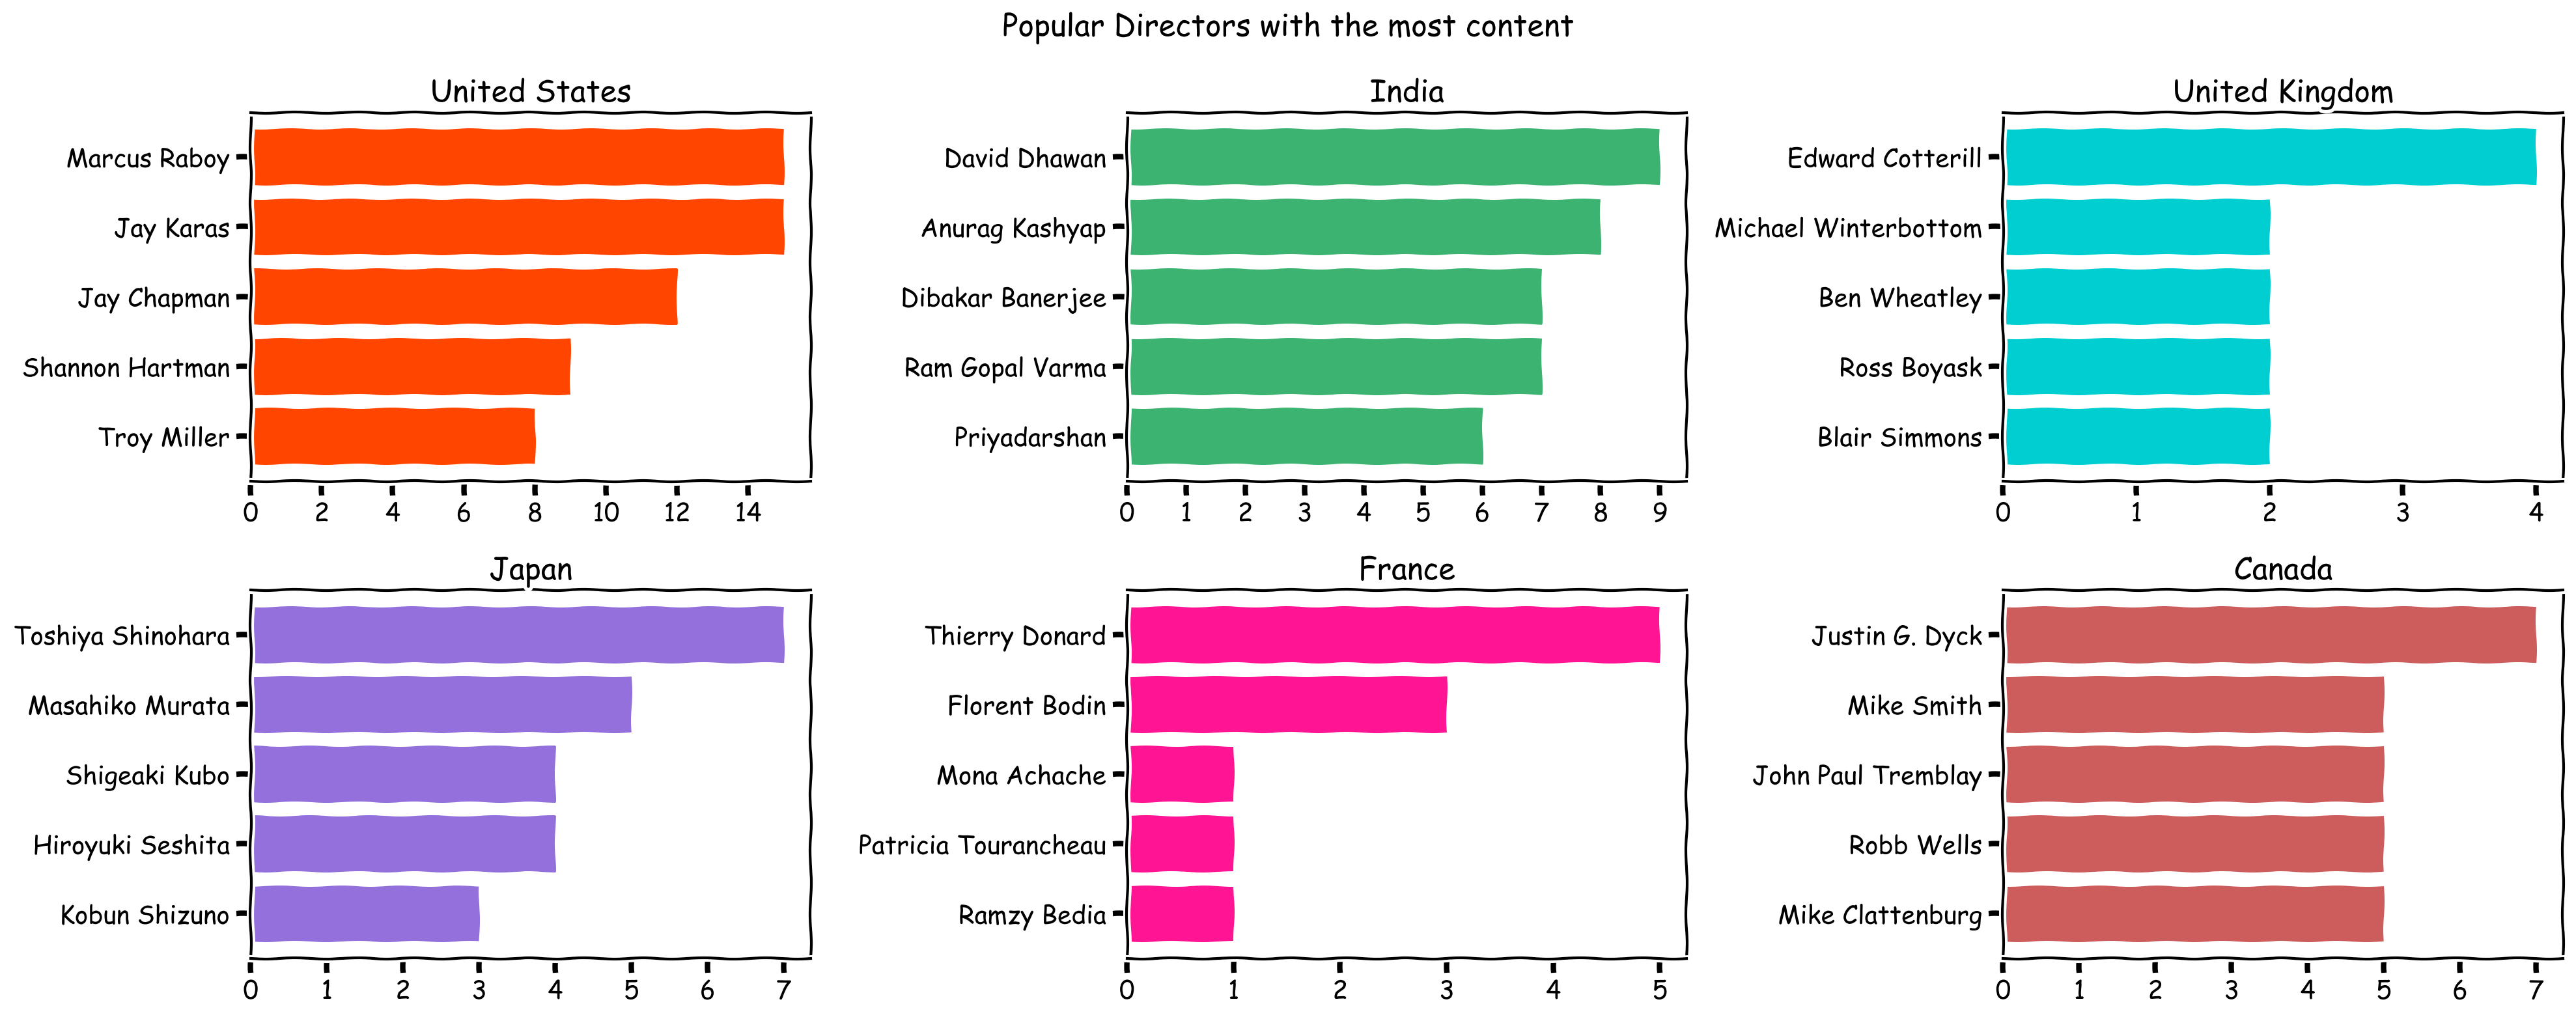

In [5]:
from collections import Counter
from matplotlib.pyplot import figure
import math

colours = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada"]
col = "director"

with plt.xkcd():
    figure(num=None, figsize=(20, 8))
    x=1
    for country in countries_list:
        country_df = df[df["country"]==country]
        categories = ", ".join(country_df[col].fillna("")).split(", ")
        counter_list = Counter(categories).most_common(6)
        counter_list = [_ for _ in counter_list if _[0] != ""]
        labels = [_[0] for _ in counter_list][::-1]
        values = [_[1] for _ in counter_list][::-1]
        if max(values)<10:
            values_int = range(0, math.ceil(max(values))+1)
        else:
            values_int = range(0, math.ceil(max(values))+1, 2)
        plt.subplot(2, 3, x)
        plt.barh(labels,values, color = colours[x-1])
        plt.xticks(values_int)
        plt.title(country)
        x+=1
    plt.suptitle('Popular Directors with the most content')
    plt.tight_layout()
    plt.show()
    

## Netflix 专注于什么样的内容？
我还想浏览评级栏并比较 Netflix 为儿童、青少年和成人制作的内容量——以及这些年来他们的重点是否从一个群体转移到另一个群体。

为此，我首先查看了 DataFrame 中的独特评级：

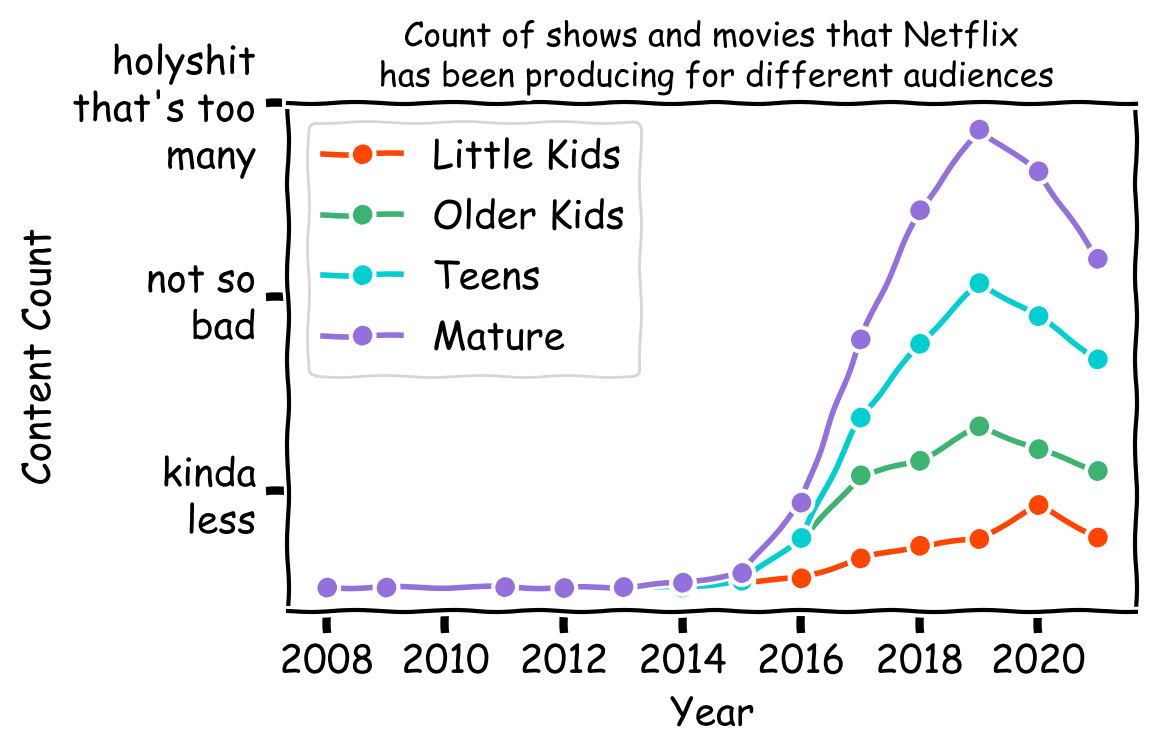

In [8]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year.astype('Int64')


ratings_list = ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV']
ratings_group_list = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
ratings_dict={
    'TV-G': 'Little Kids',
    'TV-Y': 'Little Kids',
    'G': 'Little Kids',
    'TV-PG': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-MA': 'Mature',
    'R': 'Mature',
    'NC-17': 'Mature'
}

for rating_val, rating_group in ratings_dict.items():
    df.loc[df.rating == rating_val, "rating"] = rating_group
    
    
    
df['rating_val']=1
x=0
labels=['kinda\nless', 'not so\nbad', 'holyshit\nthat\'s too\nmany']

with plt.xkcd():
    for r in ratings_group_list:
        grouped = df[df['rating']==r]
        year_df = grouped.groupby(['year_added']).sum()
        year_df.reset_index(level=0, inplace=True)
        plt.plot(year_df['year_added'], year_df['rating_val'], color=colours[x], marker='o')
        values_int = range(2008, math.ceil(max(year_df['year_added']))+1, 2)
        plt.yticks([200, 600, 1000], labels)
        plt.xticks(values_int)
        plt.title('Count of shows and movies that Netflix\n has been producing for different audiences', fontsize=12)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Content Count', fontsize=14)
        x+=1
    plt.legend(ratings_group_list)
    plt.tight_layout()
    plt.show()
    